In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

In [3]:
# Data collection
data = pd.read_csv('winequality-red.csv', sep=';', index_col=False)
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


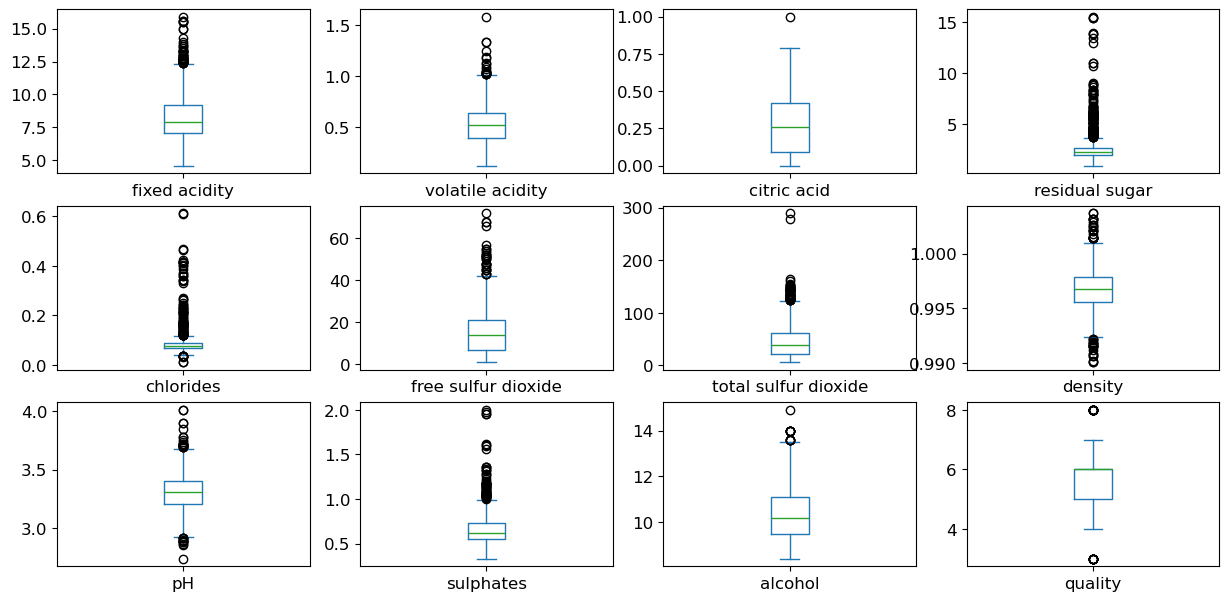

In [4]:
# Data preprocessing
# desribe the data
data.describe() # column with possible outliers - free sulphur dioxide, total sulfur dioxide, residual sugar, 
# Use box plot to check the value range
data_mean = data.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, 
sharey=False, fontsize=12, figsize=(15,20));

<Axes: >

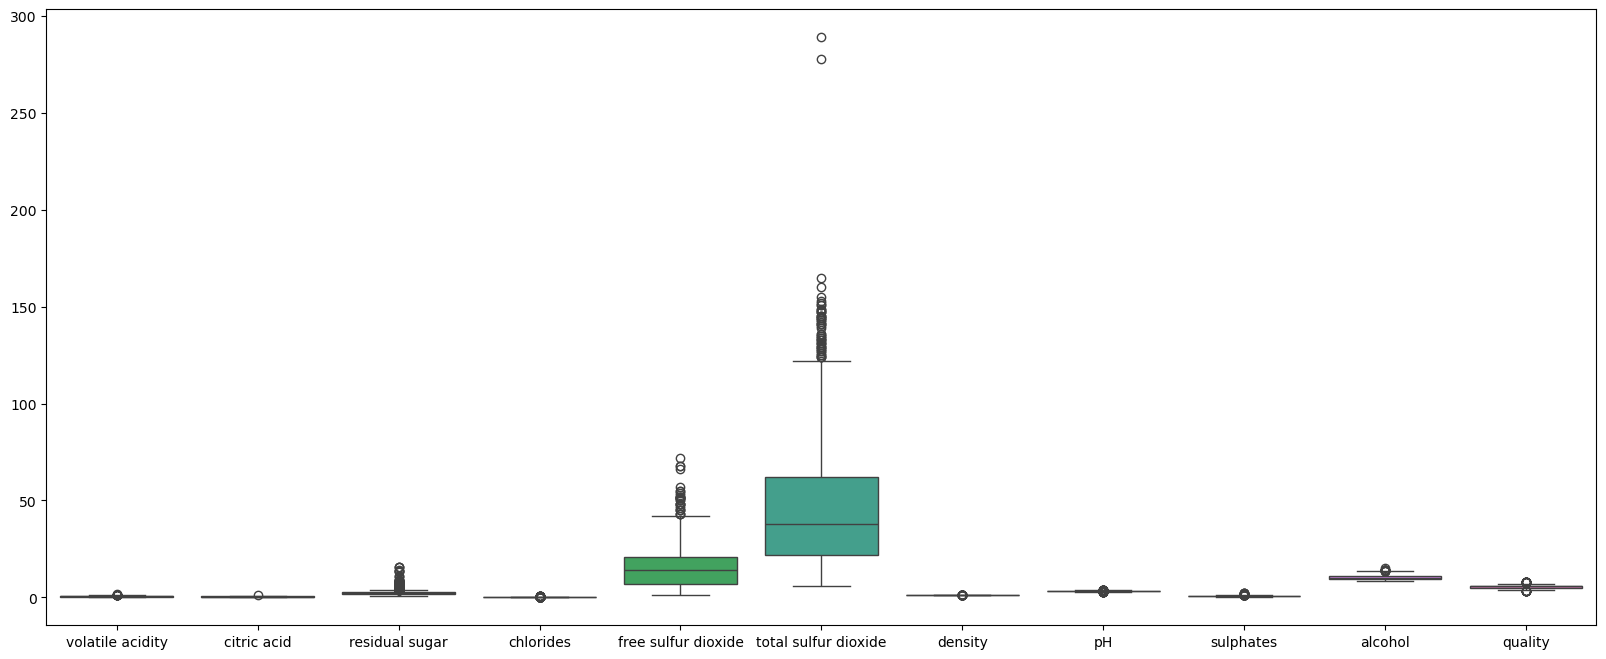

In [5]:
# Compare the features data ranges
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=data.iloc[:, 1:12],ax=ax)

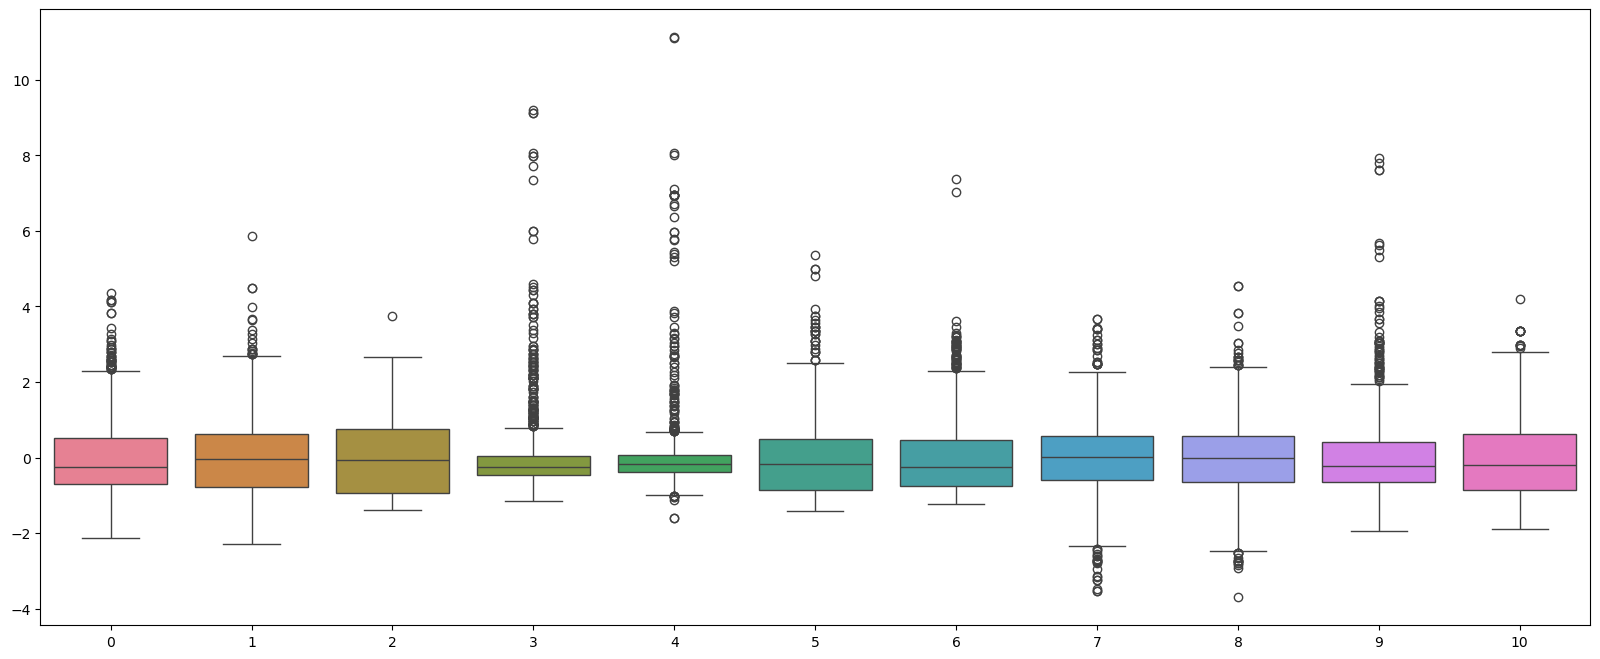

In [29]:
# Feature Normalisation
X = data.drop('quality', axis=1)
y = data['quality'].values.reshape(-1, 1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

X_biased = np.c_[X_scaled, np.ones((Xs.shape[0], 1))]


In [30]:
# Linear regression

alpha = 0.1
max_iterations = 1000
m, n = X_biased.shape  

# Gradient Descent
def gradient_descent(X, y, alpha, max_iterations, shape):
    m, n = shape
    w = np.random.randn(n, 1) 
    
    for iteration in range(max_iterations):
        gradients = (2/m) * X.T.dot(X.dot(w) - y)
        w = w - alpha * gradients

    return w

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []


for train_index, val_index in kf.split(X_biased):
    X_train, X_val = X_biased[train_index], X_biased[val_index]
    y_train, y_val = y[train_index], y[val_index]

    w = gradient_descent(X_train, y_train, alpha, max_iterations, X_train.shape)
    y_predicted = np.round(np.array(X_val).dot(w))
    mse = mean_squared_error(y_val, y_predicted)
    mse_scores.append(mse)

    
print("Average MSE:", np.mean(mse_scores))




Average MSE: 0.5003585423197492


In [31]:
# Support Vector Machine
# X_train, X_test, y_train, y_test = train_test_split(X_biased, y, test_size=0.2, random_state=15)

kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Initialize and train SVM regressor
    svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    svr_model.fit(X_train, y_train.ravel())  # .ravel() flattens y to 1D
    # Predict and evaluate
    y_pred = np.round(svr_model.predict(X_val))
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

print("Average MSE (SVR):", np.mean(mse_scores))

Average MSE (SVR): 0.4603232758620689


In [32]:
# Decision Trees

# Set up K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []


for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]


    # Initialize and train Decision Tree Regressor
    dt_model = DecisionTreeRegressor(max_depth=5, random_state=15)
    dt_model.fit(X_train, y_train)

    y_pred = np.round(dt_model.predict(X_val))
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

print("Average MSE (Decision Tree):", np.mean(mse_scores))


Average MSE (Decision Tree): 0.574153605015674


In [39]:
# Mulit-layer Perceptron Neutral Network

kf = KFold(n_splits=5, shuffle=True, random_state=15)
mse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Initialize and train MLP Regressor
    mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                             max_iter=500, random_state=15)
    mlp_model.fit(X_train, y_train.ravel())

    # Predict and evaluate
    y_pred = np.round(mlp_model.predict(X_val))
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

print("Average MSE (MLP):", np.mean(mse_scores))


C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Average MSE (MLP): 0.4759286833855799


C:\Anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
